**Mount Google Drive into your Colab.**

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!nvidia-smi


/bin/bash: nvidia-smi: command not found


In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 40.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 32.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.7 MB/s

In [4]:
import tensorflow as tf

2023-01-27 16:05:48.372241: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 16:05:51.744345: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-27 16:05:51.744385: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-27 16:05:56.863435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directo

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
IMAGE_SIZE = [224, 224]

train_path = '/workspaces/model-2/Data/train'
valid_path = '/workspaces/model-2/Data/test'

In [8]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3] , weights='imagenet', include_top=False)

2023-01-27 16:07:16.311021: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-27 16:07:16.311063: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-27 16:07:16.311091: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-12d1ef): /proc/driver/nvidia/version does not exist
2023-01-27 16:07:16.311620: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


87910968/87910968 [==============================] - 5s 0us/step


In [9]:
for layer in inception.layers:
  layer.trainable = False

In [10]:
folders = glob('/workspaces/model-2/Data/train/*')

In [11]:
folders


['/workspaces/model-2/Data/train/tomatoes',
 '/workspaces/model-2/Data/train/apples']

In [12]:
x = Flatten()(inception.output)


In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input , outputs=prediction)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [15]:
model.compile(
    loss='categorical_crossentropy' ,
    optimizer='adam' ,
    metrics=['accuracy']
)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255 ,
                                   shear_range = 0.2 ,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/workspaces/model-2/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 294 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/workspaces/model-2/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 97 images belonging to 2 classes.


In [19]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/tmp/ipykernel_5084/177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10


2023-01-27 16:09:35.573328: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25233408 exceeds 10% of free system memory.
2023-01-27 16:09:36.125102: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 24332288 exceeds 10% of free system memory.
2023-01-27 16:09:36.181979: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 48664576 exceeds 10% of free system memory.
2023-01-27 16:09:36.324611: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 14929920 exceeds 10% of free system memory.
2023-01-27 16:09:36.337907: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 33226752 exceeds 10% of free system memory.


19/19 [==============================] - 31s 1s/step - loss: 2.5848 - accuracy: 0.7551 - val_loss: 2.4435 - val_accuracy: 0.7938
Epoch 2/10
19/19 [==============================] - 28s 1s/step - loss: 0.4800 - accuracy: 0.9320 - val_loss: 0.5680 - val_accuracy: 0.8866
Epoch 3/10
19/19 [==============================] - 26s 1s/step - loss: 0.1787 - accuracy: 0.9626 - val_loss: 0.4297 - val_accuracy: 0.8557
Epoch 4/10
19/19 [==============================] - 23s 1s/step - loss: 0.0948 - accuracy: 0.9796 - val_loss: 0.5836 - val_accuracy: 0.8763
Epoch 5/10
19/19 [==============================] - 24s 1s/step - loss: 0.0990 - accuracy: 0.9864 - val_loss: 0.6389 - val_accuracy: 0.8969
Epoch 6/10
19/19 [==============================] - 24s 1s/step - loss: 0.0278 - accuracy: 0.9932 - val_loss: 0.7135 - val_accuracy: 0.8969
Epoch 7/10
19/19 [==============================] - 27s 1s/step - loss: 0.0079 - accuracy: 0.9966 - val_loss: 0.8162 - val_accuracy: 0.9072
Epoch 8/10
19/19 [=============

In [20]:
import matplotlib.pyplot as plt

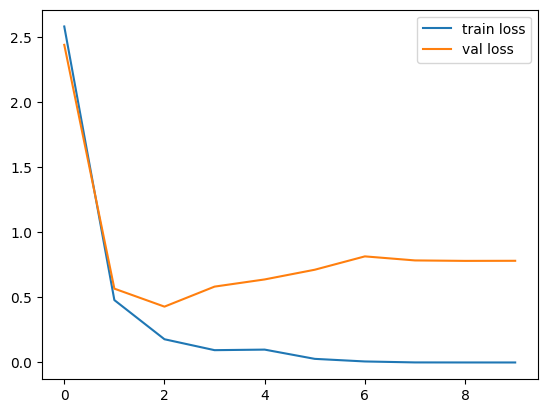

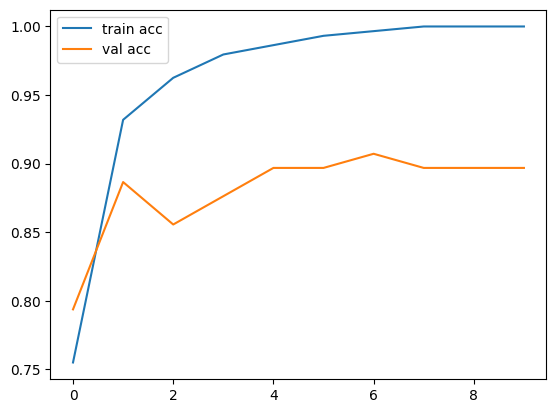

<Figure size 640x480 with 0 Axes>

In [21]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [22]:
from tensorflow.keras.models import load_model

model.save('model2_apple_and_tomato.h5')

In [23]:
y_pred = model.predict(test_set)

7/7 [==============================] - 6s 729ms/step


In [24]:
y_pred


array([[9.99984920e-01, 1.50716032e-05],
       [6.00914001e-01, 3.99085820e-01],
       [9.99999940e-01, 3.57779588e-13],
       [1.16224552e-03, 9.98837769e-01],
       [9.99999940e-01, 4.87280494e-11],
       [1.36224640e-08, 9.99999940e-01],
       [2.26345838e-16, 9.99999940e-01],
       [1.86704355e-03, 9.98133004e-01],
       [9.99999940e-01, 7.46623119e-09],
       [9.99999940e-01, 8.68657663e-12],
       [9.99999344e-01, 5.85448333e-07],
       [4.13595745e-03, 9.95864093e-01],
       [8.93840188e-05, 9.99910533e-01],
       [9.46297169e-01, 5.37029281e-02],
       [9.99999940e-01, 1.58469050e-13],
       [9.85103488e-01, 1.48964236e-02],
       [9.99880612e-01, 1.19316988e-04],
       [9.99999940e-01, 1.42511489e-10],
       [6.22513880e-07, 9.99999344e-01],
       [6.05669796e-01, 3.94330233e-01],
       [1.66111852e-06, 9.99998271e-01],
       [2.59716294e-12, 9.99999940e-01],
       [2.49690503e-12, 9.99999940e-01],
       [9.99999821e-01, 1.07345343e-07],
       [9.999957

In [25]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [26]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0])

In [27]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('model2_apple_and_tomato.h5')

In [36]:
img=image.load_img('/workspaces/model-2/Data/test/tomatoes/img_p1_24.jpeg',target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[107., 110., 127.],
        [136., 131., 135.],
        [165., 157., 146.],
        ...,
        [ 88.,  72.,  73.],
        [ 94.,  75.,  77.],
        [ 90.,  79.,  83.]],

       [[144., 177., 158.],
        [165., 189., 157.],
        [191., 204., 161.],
        ...,
        [ 88.,  76.,  78.],
        [ 89.,  75.,  75.],
        [ 90.,  79.,  83.]],

       [[183., 180., 139.],
        [194., 180., 131.],
        [205., 185., 124.],
        ...,
        [ 89.,  80.,  81.],
        [ 85.,  75.,  76.],
        [ 90.,  79.,  83.]],

       ...,

       [[209., 133., 137.],
        [210., 132., 132.],
        [210., 130., 123.],
        ...,
        [ 92., 137.,  80.],
        [107., 152., 111.],
        [113., 155., 141.]],

       [[209., 134., 138.],
        [209., 133., 133.],
        [210., 131., 126.],
        ...,
        [100., 145.,  88.],
        [109., 154., 115.],
        [113., 161., 137.]],

       [[152., 153.,  75.],
        [160., 149.,  83.],
        [174., 1

In [38]:
x.shape

(224, 224, 3)

In [39]:

x=x/255

In [40]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

1/1 [==============================] - 0s 132ms/step


array([[0.28142366, 0.7185763 ]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 90ms/step


In [43]:
a==1

array([ True])